In [1]:
import numpy as np
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data = pd.DataFrame(datasets.load_iris().data,columns=datasets.load_iris().feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data['target'] = datasets.load_iris().target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
target_names = datasets.load_iris().target_names
data['target'] = [target_names[i] for i in data['target']]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
del target_names

In [6]:
tmp = {'setosa':0,'versicolor':1,'virginica':2}
data['target'] = data['target'].map(tmp)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [9]:
data.isin(['',' ','-']).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3,random_state=37)
kmeans.fit(data)
kmeans.cluster_centers_

array([[6.624, 2.984, 5.562, 2.026, 1.98 ],
       [5.006, 3.428, 1.462, 0.246, 0.   ],
       [5.9  , 2.76 , 4.25 , 1.326, 1.02 ]])

In [12]:
data['cluster'] = kmeans.predict(data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [13]:
grouped = data.groupby('cluster').agg(['mean', 'std'])

grouped

sepal length (cm)           sepal width (cm)            \
                     mean       std             mean       std   
cluster                                                          
0                   6.624  0.587475            2.984  0.315168   
1                   5.006  0.352490            3.428  0.379064   
2                   5.900  0.524502            2.760  0.314286   

        petal length (cm)           petal width (cm)           target  \
                     mean       std             mean       std   mean   
cluster                                                                 
0                   5.562  0.536767            2.026  0.274650   1.98   
1                   1.462  0.173664            0.246  0.105386   0.00   
2                   4.250  0.459036            1.326  0.197753   1.02   

                   
              std  
cluster            
0        0.141421  
1        0.000000  
2        0.141421

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA()
pca.fit(data.drop(columns=['target','cluster']))

loadings = pca.components_.T * (np.sqrt(pca.explained_variance_))


loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(data.drop(columns=['target','cluster']).columns))], index=data.drop(columns=['target','cluster']).columns)
print("Loadings:\n", loadings_df)

Loadings:
                         PC1       PC2       PC3       PC4
sepal length (cm)  0.743108  0.323446 -0.162770  0.048707
sepal width (cm)  -0.173801  0.359689  0.167212 -0.049361
petal length (cm)  1.761545 -0.085406  0.021320 -0.074081
petal width (cm)   0.736739 -0.037183  0.152647  0.116354


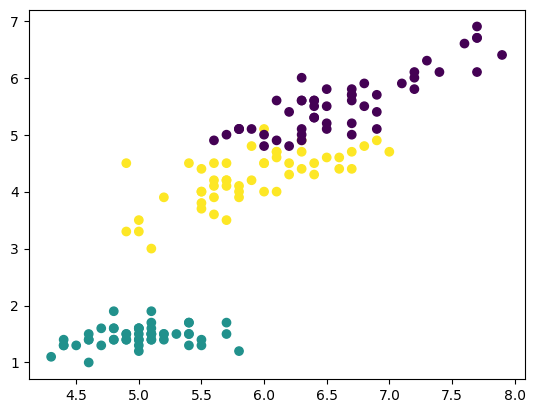

In [19]:
plt.scatter(data=data,x='sepal length (cm)',y='petal length (cm)',c=data['cluster'])

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
s = silhouette_score(data, kmeans.labels_)
print(f"Silhouette score: {s}")

Silhouette score: 0.686294865222168
